# __Fire Causes__
#### _Bureau of Fire Investigations_
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Emblem_of_the_New_York_City_Fire_Department.svg" width="120"/>
</div>

<hr>

Source: _<a href="https://data.cityofnewyork.us/Public-Safety/Bureau-of-Fire-Investigations-Fire-Causes/ii3r-svjz/about_data">NYC Open Data</a>_ <br>
Last updated: _9 May 2024_ <br>
Accessed: _3 June 2024_

<hr>

### Imports

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

### Exploration

In [300]:
# Set the path to the file
path = 'datasets/001. Bureau of Fire Investigations - Fire Causes/Bureau_of_Fire_Investigations_-_Fire_Causes_20240603.csv'

In [301]:
df = pd.read_csv(path)
df.head()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [302]:
# Set the new column names
colnames = ['Year', 'ID', 'Date', 'Borough', 'Fire battalion', 'Community district', 
            'Police precinct', 'Incident type', 'Fire cause', 'Fire cause category']

# Set the new column datatypes
#coldtypes = {'Year': 'int64', 'ID': 'int64', 'Date': 'str', 'Borough': 'str', 
#             'Fire battalion': 'int64', 'Community district': 'int64', 
#             'Police precinct': 'int64', 'Incident type': 'str', 
#             'Fire cause': 'str', 'Fire cause category': 'str'}

In [303]:
# Set the new column names
df = pd.read_csv(path, names = colnames, header = 0)
df.head()

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [304]:
# #, dtype = coldtypes)#, parse_dates=['Incident_DateTime'])

In [305]:
def dataset_check(dataset, stats_check = False, corr_check = False):
    # Calculate
    df = dataset
    columns = df.shape[1]
    rows = df.shape[0]
    duplicate_rows = df.duplicated().sum()
    dtypes = df.dtypes
    missing = df.isna().sum()
    missing = missing[missing > 0]
    missing_percentage = (df.isna().sum() / len(df) * 100).round(2)
    missing_percentage = missing_percentage[missing_percentage > 0]
    unique = df.nunique()
    stats = df.describe() if stats_check else None
    corr = df.corr() if corr_check else None

    # Print
    print(f'COLUMNS:\n{columns:,}\n'.replace(',', ' '))
    print(f'ROWS:\n{rows:,}\n'.replace(',', ' '))
    if duplicate_rows > 0:
        print(f'DUPLICATE ROWS:\n{duplicate_rows}\n')
    print('DATATYPES:')
    print(dtypes, '\n')
    print('MISSING VALUES:')
    print(missing, '\n')
    print('MISSING VALUES IN %:')
    print(missing_percentage.apply(lambda x: f'{x:.2f}%'), '\n')
    print('UNIQUE VALUES:')
    print(unique, '\n')
    
    # Conditional part
    if stats_check:
        print('BASIC STATISTICS:')
        print(stats, '\n')
    if corr_check:
        print('CORRELATION MATRIX:')
        print(corr, '\n')

In [306]:
# Perform the basic check
dataset_check(df, stats_check = False, corr_check = False)

COLUMNS:
10

ROWS:
53 741

DATATYPES:
Year                    int64
ID                      int64
Date                   object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object 

MISSING VALUES:
Borough                 260
Fire battalion         7658
Community district      338
Police precinct         344
Incident type           827
Fire cause               73
Fire cause category      61
dtype: int64 

MISSING VALUES IN %:
Borough                 0.48%
Fire battalion         14.25%
Community district      0.63%
Police precinct         0.64%
Incident type           1.54%
Fire cause              0.14%
Fire cause category     0.11%
dtype: object 

UNIQUE VALUES:
Year                       9
ID                      9543
Date                   52343
Borough                    6
Fire battalion            57
Community di

Let’s check what we have:
- <b>Duplicates.</b> There are no duplicate rows.
- <b>Datatypes.</b> Columns <code>Date</code>, <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> are seen as <code>object</code> columns even though they contain dates or numbers. This should be investigated.
- <b>Missing values.</b> We have relatively many missing values in column <code>Incident type</code> and we have _a lot_ of missing values in <code>Fire battalion</code>. This is very strange — how come _so many_ incidents do not have an assigned battalion. Does this mean that some fires in the city were not reported/were not handled by the Fire Department? 
- <b>Unique values.</b> We have 53 741 rows, but the <code>ID</code> column has 9 543 unique values. That means that the column is of no use and can be dropped. Also, New York has 5 boroughs (see image below) and not 6. Also a point of interest.

<div>
<img src="https://www.loumovesyou.com/wp-content/uploads/2022/11/FiveBoroughs-01.jpg" width="600"/>
</div>

Let’s check what are the unique values per column.

In [307]:
def uvalues_check(dataset, columns):
    print('UNIQUE VALUES\n')
    for column in columns:
        print(column.upper())
        uvalues = dataset[column].unique()
        uvalues_sorted = sorted(uvalues, key = lambda x: str(x).lower())
        print(uvalues_sorted, '\n')

In [308]:
df.columns

Index(['Year', 'ID', 'Date', 'Borough', 'Fire battalion', 'Community district',
       'Police precinct', 'Incident type', 'Fire cause',
       'Fire cause category'],
      dtype='object')

In [309]:
uvalues_check(df, ['Year', 'Borough', 'Fire battalion', 'Community district',
                   'Police precinct', 'Incident type', 'Fire cause',
                   'Fire cause category'])

UNIQUE VALUES

YEAR
[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 

BOROUGH
['Bronx', 'Brooklyn', 'Manhattan', nan, 'Outside of NYC', 'Queens', 'Staten Island'] 

FIRE BATTALION
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '26', '27', '28', '3', '31', '32', '33', '35', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '57', '58', '6', '7', '8', '9', 'BC', 'CD', 'MR', nan, 'OP', 'SC', 'TR'] 

COMMUNITY DISTRICT
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9', nan, 'Out of NYC'] 

POLICE PRECINCT
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '12', '120', '121', '122', '123', '13', '14', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '28', '30', '32', '33', '34', '40', '41', '42', '43', '44', '45', '46'

Let’s also check columns <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> for textual values.

In [310]:
def text_check(dataset, columns):
    df = dataset
    print('NON-NUMERIC VALUES\n')
    for column in columns:
        numeric = pd.to_numeric(df[column], errors = 'coerce')
        text_values = df[column][numeric.isna() & df[column].notna()].unique()
        text_values_sorted = sorted(text_values, key = lambda x: x.lower())
        
        if len(text_values_sorted) > 0:
            print(column.upper())
            print(text_values_sorted, '\n')
        else:
            print(column.upper())
            print('Numeric values only\n')

In [311]:
text_check(df, ['Fire battalion', 'Community district', 'Police precinct'])

NON-NUMERIC VALUES

FIRE BATTALION
['BC', 'CD', 'MR', 'OP', 'SC', 'TR'] 

COMMUNITY DISTRICT
['Out of NYC'] 

POLICE PRECINCT
['5th', '7th', 'HWY2', 'HY2', 'mtn', 'MTS', 'NC05', 'NC08', 'NJ', 'PAPD', 'PSA2', 'PSA7', 'SC01', 'SC07'] 



The <code>ID</code> column can be surely dropped, but what about these textual values we’ve just found out? And what about <code>Outside of NYC</code> in column <code>Borough</code>? Let’s create some pivots to see if these values can be dropped. We can begin with the <code>Borough</code>.

In [312]:
nan_values = 'Unknown'
df['Borough'].fillna(nan_values, inplace = True)

pvt_borough = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Borough',
    aggfunc = 'count',
)

pvt_borough['Percentage'] = (pvt_borough['ID'] / pvt_borough['ID'].sum()) * 100
pvt_borough = pvt_borough.sort_values(by = ['Percentage'], ascending = False)

pvt_borough['Percentage'] = pvt_borough['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_borough.index = pvt_borough.index.to_series().replace({nan_values: np.nan})

pvt_borough.tail(50)

,ID,Percentage
Borough,,
Brooklyn,15823,29.44%
Bronx,12268,22.83%
Queens,12169,22.64%
Manhattan,10381,19.32%
Staten Island,2763,5.14%
NaN,260,0.48%
Outside of NYC,77,0.14%


There were 77 incidents <code>Outside of NYC</code> and 260 incidents with missing data. Since (a) the numbers are relatively small (0,52% in total) and (b) we will need borough-specific information for our further analysis, rows with these values will be dropped before we proceed.

In [313]:
df = df[df['Borough'].notna() & ~df['Borough'].isin(['Outside of NYC', 'Unknown'])]
df['Borough'].value_counts()

Brooklyn         15823
Bronx            12268
Queens           12169
Manhattan        10381
Staten Island     2763
Name: Borough, dtype: int64

This looks much better! Let’s continue with <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code>.
<br><br><code>Fire battalion</code>:

In [314]:
nan_values = 'Unknown'
df['Fire battalion'].fillna(nan_values, inplace = True)

pvt_firebat = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Fire battalion',
    aggfunc = 'count',
)

pvt_firebat['Percentage'] = (pvt_firebat['ID'] / pvt_firebat['ID'].sum()) * 100
pvt_firebat = pvt_firebat.sort_values(by = ['Percentage'], ascending = False)

pvt_firebat['Percentage'] = pvt_firebat['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_firebat.index = pvt_firebat.index.to_series().replace({nan_values: np.nan})

pvt_firebat

,ID,Percentage
Fire battalion,,
NaN,7431,13.91%
50,1667,3.12%
54,1500,2.81%
15,1432,2.68%
46,1410,2.64%
18,1356,2.54%
19,1349,2.53%
44,1305,2.44%
38,1226,2.30%


<code>Community district</code>:

In [315]:
nan_values = 'Unknown'
df['Community district'].fillna(nan_values, inplace = True)

pvt_comdist = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Community district',
    aggfunc = 'count',
)

pvt_comdist['Percentage'] = (pvt_comdist['ID'] / pvt_comdist['ID'].sum()) * 100
pvt_comdist = pvt_comdist.sort_values(by = ['Percentage'], ascending = False)

pvt_comdist['Percentage'] = pvt_comdist['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_comdist.index = pvt_comdist.index.to_series().replace({nan_values: np.nan})

pvt_comdist

,ID,Percentage
Community district,,
1,5700,10.67%
12,5129,9.60%
3,4861,9.10%
5,4640,8.69%
9,3505,6.56%
2,3435,6.43%
4,3393,6.35%
7,3228,6.04%
10,3166,5.93%


<code>Police precinct</code>:

In [316]:
nan_values = 'Unknown'
df['Police precinct'].fillna(nan_values, inplace = True)

pvt_precinct = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Police precinct',
    aggfunc = 'count',
)

pvt_precinct['Percentage'] = (pvt_precinct['ID'] / pvt_precinct['ID'].sum()) * 100
pvt_precinct = pvt_precinct.sort_values(by = ['Percentage'], ascending = False)

pvt_precinct['Percentage'] = pvt_precinct['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_precinct.index = pvt_precinct.index.to_series().replace({nan_values: np.nan})

pvt_precinct.tail(25)

,ID,Percentage
Police precinct,,
78,357,0.67%
30,356,0.67%
17,355,0.66%
26,355,0.66%
100,351,0.66%
76,348,0.65%
20,345,0.65%
6,317,0.59%
NaN,200,0.37%


After performing the check we can conclude this:
- <b>Fire battalion:</b> As we’ve already seen, there’re many rows without a battalion. I will replace them with a <code>999</code>. Battalions that have an occurrence of less than 327 look suspicious. Probably they are outliers or errors. I will replace them with <code>998</code>.
- <b>Community district:</b> Missing values will be replaced with <code>999</code>. As for <code>Out of NYC</code> I will replace them with <code>998</code>.
- <b>Police precinct:</b> Missing values will be replaced with <code>999</code>. <code>5th</code> and <code>7th</code> are clearly typos. This should be corrected by removing <code>th</code>. Similar to <code>Fire battalion</code> precinct’s that have an occurrence of less than 317 look suspicious. I will replace them with <code>998</code>.

<table>
    <thead>
        <tr><th>Column</th><th>This value</th><th>Changed to</th></tr>
    </thead>
    <tbody>
        <tr><td>Fire battalion</td><td>NaN</td><td>999</td></tr>
        <tr><td>Fire battalion</td><td><i>Occurrence of less than 327</i></td><td>998</td></tr>
        <tr><td>Community district</td><td>NaN</td><td>999</td></tr>
        <tr><td>Community district</td><td>Out of NYC</td><td>998</td></tr>
        <tr><td>Police precinct</td><td>5th</td><td>5</td></tr>
        <tr><td>Police precinct</td><td>7th</td><td>7</td></tr>
        <tr><td>Police precinct</td><td>NaN</td><td>999</td></tr>
        <tr><td>Police precinct</td><td><i>Occurrence of less than 317</i></td><td>998</td></tr>
    </tbody>
</table>

In [317]:
# Fire battalion
# Replace 'NaN' and 'Unknown' with '999'
df['Fire battalion'] = df['Fire battalion'].fillna('999').replace('Unknown', '999')

# Replace values with occurrence of less than 327 with '998'
replace_firebat = df['Fire battalion'].value_counts()
replace_firebat = replace_firebat[replace_firebat < 327].index
df['Fire battalion'] = df['Fire battalion'].replace(replace_firebat, '998')

# Community district
# Replace 'NaN' and 'Unknown' with '999' and 'Out of NYC' with '998'
df['Community district'] = df['Community district'].fillna('999').replace({'Unknown': '999', 'Out of NYC': '998'})

# Police precinct
# Remove 'th' from '5th' and '7th'
df['Police precinct'] = df['Police precinct'].str.replace('th', '')

# Replace 'NaN' and 'Unknown' with '999'
df['Police precinct'] = df['Police precinct'].fillna('999').replace('Unknown', '999')

# Replace values with occurrence of less than 200 with '998'
replace_precinct = df['Police precinct'].value_counts()
replace_precinct = replace_precinct[replace_precinct < 200].index
df['Police precinct'] = df['Police precinct'].replace(replace_precinct, '998')

In [320]:
text_check(df, ['Fire battalion', 'Community district', 'Police precinct'])

NON-NUMERIC VALUES

FIRE BATTALION
Numeric values only

COMMUNITY DISTRICT
Numeric values only

POLICE PRECINCT
Numeric values only



In [ ]:
uvalues_check(df, ['Year', 'Borough', 'Fire battalion', 'Community district',
                   'Police precinct', 'Incident type', 'Fire cause',
                   'Fire cause category'])

UNIQUE VALUES

YEAR
[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 

BOROUGH
['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] 

FIRE BATTALION
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '26', '27', '28', '3', '31', '32', '33', '35', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '57', '58', '6', '7', '8', '9', '998', '999'] 

COMMUNITY DISTRICT
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9', '998', '999'] 

POLICE PRECINCT
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '120', '121', '122', '123', '13', '14', '17', '18', '19', '20', '23', '24', '25', '26', '28', '30', '32', '33', '34', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '52', '6', '60', '61', '62', '63', '66', '67', '68', '69', '7', '70',

In [323]:
df['Incident type'].value_counts()

MD Residential Structure          20556
Vehicle                            9958
PD Residential Structure           6779
Commercial Structure               3352
Other                              2348
Outside Rubbish                    2247
Burn Notification                  1363
Burn Notification (Albany)         1280
MFA                                 843
No Fire                             750
Garage/Shed                         586
School                              326
Transit                             267
Brush                               242
Religious Structure                 183
Manhole                             175
Government Structure                173
Group Home                          163
Hotel                               160
Hospital                            152
Public Structure                    121
Sidewalk                            112
Street                               84
Public Hallway                       70
Boat                                 69


# Incident type: fill na's with Uncategorized. Or Unknown?

In [321]:
df.head(10)

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary
5,2016,10001,01/01/2016 12:46:00 AM,Manhattan,9,4,14,MD Residential Structure,Candle,Open Flame
6,2016,77003,01/01/2016 01:24:00 AM,Brooklyn,32,2,76,PD Residential Structure,Other - Open Flame,Open Flame
7,2016,77002,01/01/2016 01:46:00 AM,Queens,46,4,110,PD Residential Structure,Smoking (Cigarette/Cigar),Smoking
8,2016,77001,01/01/2016 02:52:00 AM,Manhattan,16,10,32,MD Residential Structure,Incendiary - Combustible Material,Incendiary
9,2016,77004,01/01/2016 03:45:00 AM,Brooklyn,28,4,83,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking


In [319]:
# Perform the basic check
dataset_check(df, stats_check = False, corr_check = False)

COLUMNS:
10

ROWS:
53 404

DATATYPES:
Year                    int64
ID                      int64
Date                   object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object 

MISSING VALUES:
Incident type          789
Fire cause              68
Fire cause category     56
dtype: int64 

MISSING VALUES IN %:
Incident type          1.48%
Fire cause             0.13%
Fire cause category    0.10%
dtype: object 

UNIQUE VALUES:
Year                       9
ID                      9537
Date                   52012
Borough                    5
Fire battalion            51
Community district        20
Police precinct           78
Incident type             33
Fire cause               134
Fire cause category       15
dtype: int64 



## Rest

In [49]:
df['Fire battalion'].unique()

array(['50', '21', '37', '15', '9', '32', '46', '16', '28', '1', '3',
       '20', '57', '49', '10', '14', '58', '43', '48', '39', '44', '6',
       '4', '27', '45', '13', '8', '47', '31', '51', '54', '42', '7',
       '26', '19', '52', '35', '12', '23', '18', '40', '53', '38', '41',
       '11', '22', '33', nan, '17', '2', '55', '0', 'SC', 'BC', 'OP',
       'CD', 'TR', 'MR'], dtype=object)

In [50]:
pivot1 = df.pivot_table(index = 'Fire battalion',
               columns = 'Borough',
               values = 'ID',
               aggfunc = 'count',
               fill_value = 0,
               margins = True, 
               margins_name = 'Total')

pivot1.sort_values(by=['Total'], ascending=False)

Borough,Bronx,Brooklyn,Manhattan,Outside of NYC,Queens,Staten Island,Total
Fire battalion,,,,,,,
Total,10731,13711,8819,2,10316,2396,45975
50,0,2,1,0,1664,0,1667
54,0,5,0,0,1495,0,1500
15,1426,3,3,0,0,0,1432
46,1,0,1,0,1407,1,1410
18,1355,0,0,0,1,0,1356
19,1344,0,5,0,0,0,1349
44,1,1300,0,0,4,0,1305
38,0,1224,1,0,0,1,1226


In [51]:
pivot2 = df.pivot_table(
    index = 'Borough',
    values = 'ID',
    aggfunc = 'count',
    #fill_value = 0,
    margins = True,
    #margins_name = 'Total',
)

pivot2.sort_values(by = 'ID', ascending = False)

,ID
Borough,
All,53481
Brooklyn,15823
Bronx,12268
Queens,12169
Manhattan,10381
Staten Island,2763
Outside of NYC,77


In [52]:
outsideofNYC = df[df['Borough'] == 'Outside of NYC']
outsideofNYC.head(20)

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
144,2016,60016,01/05/2016 07:00:00 PM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
2025,2016,60203,04/02/2016 07:00:00 PM,Outside of NYC,NaN,Out of NYC,SC01,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
2327,2016,60234,04/17/2016 12:01:00 AM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
2746,2016,60296,05/06/2016 10:30:00 AM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
3401,2016,75001,06/07/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3422,2016,75002,06/08/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3436,2016,75003,06/09/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3518,2016,75004,06/13/2016 10:00:00 AM,Outside of NYC,NaN,12,33,No Fire,Fireworks Related,No Fire
3534,2016,75005,06/14/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3554,2016,75006,06/15/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire


In [53]:
outsideofNYC[outsideofNYC['Borough'] != 'Outside of NYC']

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category


In [54]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [55]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [56]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [57]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [58]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [59]:
77/53481*100

0.143976365438193

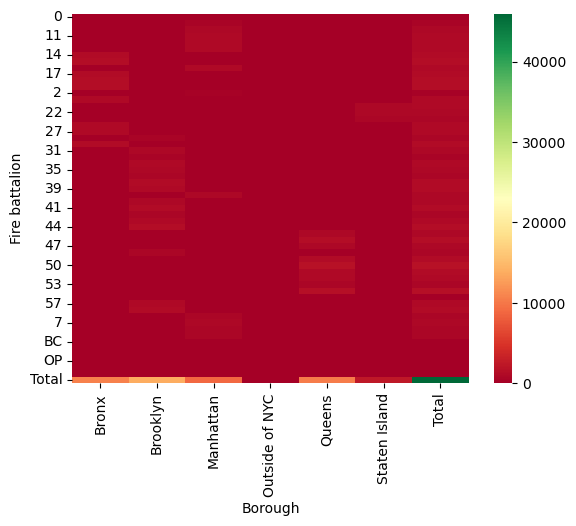

In [60]:
# Heatmap example
sns.heatmap(pivot1, cmap = 'RdYlGn');

In [61]:
pivot3 = df.pivot_table(index = 'Police precinct',
               columns = 'Borough',
               values = 'ID',
               aggfunc = 'count',
               fill_value = 0,
               margins = True, 
               margins_name = 'Total')

pivot3b = pivot3.sort_values(by=['Total'], ascending=False)
pivot3b[pivot3b['Total'] <= 300].index

Index(['SC07', '5th', '2', '0', 'PAPD', 'NJ', '11', '22', 'HY2', '7th', 'MTS',
       'NC05', '12', 'PSA7', 'HWY2', 'PSA2', 'SC01', '21', 'mtn', 'NC08'],
      dtype='object', name='Police precinct')

In [62]:
pivot3b[pivot3b['Total'] <= 400]['Total']#.sum()

Police precinct
112     390
94      387
10      385
5       384
111     369
28      361
78      357
17      356
30      356
26      355
100     352
76      348
20      345
6       317
SC07     40
5th      15
2        13
0        13
PAPD      5
NJ        4
11        4
22        4
HY2       3
7th       3
MTS       2
NC05      2
12        2
PSA7      2
HWY2      1
PSA2      1
SC01      1
21        1
mtn       1
NC08      1
Name: Total, dtype: int64

In [63]:
pivot4 = df.pivot_table(index = 'Community district',
               columns = 'Borough',
               values = 'ID',
               aggfunc = 'count',
               fill_value = 0,
               margins = True, 
               margins_name = 'Total')

pivot4.sort_values(by=['Total'], ascending=False)

Borough,Bronx,Brooklyn,Manhattan,Outside of NYC,Queens,Staten Island,Total
Community district,,,,,,,
Total,12232,15784,10343,76,12094,2744,53273
1,1357,1255,464,1,1209,1415,5701
12,1410,724,1046,1,1949,0,5130
3,1138,1313,1110,0,688,612,4861
5,1157,1735,1001,1,746,1,4641
9,1376,685,699,1,745,0,3506
2,630,874,567,0,654,710,3435
4,1108,700,821,0,762,2,3393
7,902,560,800,0,966,0,3228


In [65]:
df[df['Fire battalion'] == '50']

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary
26,2016,77012,01/01/2016 09:00:00 PM,Queens,50,12,113,PD Residential Structure,Preliminary Investigation Only,Other
49,2016,60075,01/02/2016 07:51:00 PM,Queens,50,12,103,Burn Notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Other
95,2016,40010,01/04/2016 02:32:00 PM,Queens,50,12,103,MD Residential Structure,Motors - Fan,Motors
...,...,...,...,...,...,...,...,...,...,...
53529,2024,40317,03/29/2024 09:12:00 PM,Queens,50,12,103,Group Home,Smoking (Cigarette/Cigar),Smoking
53539,2024,40320,03/30/2024 05:48:00 PM,Queens,50,12,103,PD Residential Structure,Smoking (Cigarette/Cigar),Smoking
53559,2024,40326,04/01/2024 02:17:00 PM,Queens,50,6,112,MD Residential Structure,Other - Electrical,Electrical
53598,2024,40341,04/07/2024 10:18:00 AM,Queens,50,8,107,Commercial Structure,Hard Wire Outlet,Electrical


In [66]:
df = pd.read_csv(path, parse_dates=['Incident_DateTime'])
df.head()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,2016-01-01 00:08:00,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,2016-01-01 00:13:00,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,2016-01-01 00:21:00,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,2016-01-01 00:29:00,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,2016-01-01 00:32:00,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [67]:
cond = df['Incident_DateTime'].dt.dayofweek == 1
df[cond]

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
116,2016,77038,2016-01-05 00:15:00,Manhattan,1,1,1,MD Residential Structure,Candle,Open Flame
117,2016,70002,2016-01-05 01:23:00,Manhattan,11,7,20,Outside Rubbish,Smoking (Cigarette/Cigar),Smoking
118,2016,77064,2016-01-05 02:16:00,Brooklyn,38,9,71,MD Residential Structure,Preliminary Investigation Only,Other
119,2016,50003,2016-01-05 03:29:00,Staten Island,21,2,122,MFA,MFA,No Fire
120,2016,30017,2016-01-05 06:07:00,Brooklyn,39,5,75,Commercial Structure,Other - Hot Objects,Hot Objects
...,...,...,...,...,...,...,...,...,...,...
53709,2024,30404,2024-04-23 13:07:00,Brooklyn,42,11,62,PD Residential Structure,Electrical Wiring,Electrical
53710,2024,20330,2024-04-23 14:02:00,Bronx,18,6,48,Vehicle,Preliminary Investigation Only,Other
53711,2024,30407,2024-04-23 16:24:00,Brooklyn,38,9,71,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
53733,2024,40399,2024-04-30 02:08:00,Queens,46,4,110,Vehicle,Preliminary Investigation Only,Other


In [71]:
df['Incident_DateTime'].max()

Timestamp('2024-05-03 17:07:00')

In [73]:
print(np.sort(df['Case_Year'].unique()))

[2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [75]:
df.sort_values(by = ['Case Number', 'Incident_DateTime']).head(20)

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
30960,2020,0,2020-03-24 17:02:57,Brooklyn,NaN,17,67,Other,Preliminary Investigation Only,Other
41414,2022,0,2022-01-26 11:15:34,Brooklyn,NaN,1,90,Other,Preliminary Investigation Only,Other
29287,2020,1,2020-01-01 00:33:55,Manhattan,NaN,8,19,Other,Other,Other
35539,2021,10000,2021-01-01 04:03:52,Manhattan,NaN,6,13,Other,Other,Other
41038,2022,10000,2022-01-03 09:07:05,Manhattan,NaN,7,20,Hotel,Other,Other
46891,2023,10000,2023-01-01 00:51:15,Manhattan,16,10,32,MD Residential Structure,Other - Hot Objects,Hot Objects
52461,2024,10000,2024-01-01 01:37:00,Manhattan,NaN,1,14,No Fire,Preliminary Investigation Only,Other
5,2016,10001,2016-01-01 00:46:00,Manhattan,9,4,14,MD Residential Structure,Candle,Open Flame
8036,2017,10001,2017-01-02 03:46:29,Manhattan,4,3,5,MD Residential Structure,Electrical Wiring,Electrical
15471,2018,10001,2018-01-01 22:58:45,Manhattan,NaN,7,24,Commercial Structure,Stove/Cooking - Other,Cooking Carelessness


In [76]:
groupby1 = df.groupby(by = ['Case Number']).count()
groupby1['Incident_DateTime'].sort_values(ascending = False)

Case Number
40102    9
20203    9
20212    9
20211    9
30125    9
        ..
60576    1
60575    1
60574    1
60573    1
80298    1
Name: Incident_DateTime, Length: 9543, dtype: int64

In [77]:
df[df['Case Number'] == 20203].sort_values(by = 'Case_Year')

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
2344,2016,20203,2016-04-17 18:26:00,Bronx,18,9,43,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
10442,2017,20203,2017-04-20 04:15:47,Bronx,27,7,52,MD Residential Structure,Incendiary - Combustible Material,Incendiary
17487,2018,20203,2018-04-10 14:55:13,Bronx,13,5,46,MD Residential Structure,Electrical Wiring,Electrical
24400,2019,20203,2019-04-23 17:31:51,Bronx,14,1,40,MD Residential Structure,Stove/Cooking - Electric,Cooking Carelessness
30805,2020,20203,2020-03-14 00:46:46,Bronx,NaN,9,43,MD Residential Structure,Incendiary,Incendiary
36550,2021,20203,2021-03-11 09:20:10,Bronx,3,9,43,Vehicle,Motors - Fossil Fuel Powered,Motors
42287,2022,20203,2022-03-19 13:48:06,Bronx,26,2,41,MD Residential Structure,Food on the Stove,Cooking Carelessness
48137,2023,20203,2023-03-09 10:35:20,Bronx,17,4,44,MD Residential Structure,Electrical Wiring,Electrical
53336,2024,20203,2024-03-10 11:28:00,Bronx,27,11,52,Vehicle,Preliminary Investigation Only,Other
